# 1. Mô tả bộ dữ liệu
### Nguồn dữ liệu:
- Bộ dữ liệu Breast Cancer Wisconsin (Diagnostic) được cung cấp bởi UCI Machine Learning Repository.
- Bộ dữ liệu chứa các phép đo hình học được trích xuất từ ảnh chụp mô vú bằng kính hiển vi, nhằm hỗ trợ việc phân loại khối u lành tính (Benign - B) hoặc ác tính (Malignant - M).
### Mục tiêu bài toán:
Xây dựng mô hình học máy để phân loại tế bào ung thư vú thành hai loại:

- M: Malignant (ác tính)

- B: Benign (lành tính)

→ Đây là bài toán phân loại nhị phân (binary classification).
### Quy mô dữ liệu:
- Tổng số mẫu: 569

- Tổng số cột: 32

  - 1 cột mã định danh (id)

  - 1 cột nhãn (diagnosis)

  - 30 cột đặc trưng số (float)

- Không có giá trị thiếu (NaN).
### Các thuộc tính chính:
| Nhóm đặc trưng                         | Ví dụ                                           | Mô tả                                     | Kiểu dữ liệu          |
| -------------------------------------- | ----------------------------------------------- | ----------------------------------------- | --------------------- |
| **Thông tin chung**                    | `id`, `diagnosis`                               | Mã bệnh nhân và nhãn phân loại (M/B)      | Numeric / Categorical |
| **Đặc trưng trung bình (mean)**        | `radius_mean`, `texture_mean`, `area_mean`, ... | Giá trị trung bình của các phép đo tế bào | Numeric               |
| **Đặc trưng sai số chuẩn (se)**        | `radius_se`, `compactness_se`, ...              | Sai số chuẩn của các phép đo              | Numeric               |
| **Đặc trưng giá trị lớn nhất (worst)** | `radius_worst`, `concavity_worst`, ...          | Giá trị cực đại của các phép đo tế bào    | Numeric               |


### Đặc điểm dữ liệu:

- Cột nhãn diagnosis có hai giá trị:

  - M (ác tính): 212 mẫu (≈ 37%)

  - B (lành tính): 357 mẫu (≈ 63%)

- Không có giá trị thiếu hoặc ngoại lai rõ rệt.

- Tất cả 30 đặc trưng là dạng số thực và có thang đo khác nhau → cần chuẩn hóa (standardization) trước khi huấn luyện.

- Các đặc trưng thể hiện sự khác biệt về hình dạng, kích thước và kết cấu tế bào.

### Chất lượng và xử lý dữ liệu:

- Dữ liệu sạch, không cần loại bỏ dòng.

- Mã hóa nhãn diagnosis:

  - M → 1

  - B → 0

- Chuẩn hóa đặc trưng bằng StandardScaler để tránh chênh lệch thang đo.

- Không cần xử lý giá trị thiếu.

### Ứng dụng và phạm vi sử dụng:

- Phát hiện sớm ung thư vú qua hình ảnh mô học.

- Hỗ trợ chẩn đoán trong y học chính xác.

- Dùng trong đào tạo và đánh giá các mô hình:

  - Logistic Regression

  - Random Forest

  - SVM

  - Neural Network

# 2. Quy trình chia dữ liệu và huấn luyện mô hình Logistic Regression

## 2.1 Tải và đọc dữ liệu

In [1]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

raw_dataset = pd.read_csv(url, names=column_names)

print("  PHÂN TÍCH CÁC NHÃN/GIÁ TRỊ ĐỘC NHẤT TRONG DỮ LIỆU  ")

for col in raw_dataset.columns:
    print(f"\n--- Cột: {col} (Dtype: {raw_dataset[col].dtype}) ---")

    if raw_dataset[col].dtype == 'object':
        print("Các nhãn/giá trị độc nhất và tần suất:")
        print(raw_dataset[col].value_counts(dropna=False).head(10))
        print(f"Tổng số giá trị độc nhất: {raw_dataset[col].nunique()}")

    elif raw_dataset[col].dtype == 'int64':
        if raw_dataset[col].nunique() <= 10:
            print("Các giá trị/nhãn số nguyên và tần suất:")
            print(raw_dataset[col].value_counts(dropna=False))
        else:
            print(f"Số lượng giá trị độc nhất: {raw_dataset[col].nunique()}. "
                  f"Giá trị nhỏ nhất: {raw_dataset[col].min()}, Giá trị lớn nhất: {raw_dataset[col].max()}.")

    elif raw_dataset[col].dtype == 'float64':
        print(f"Số lượng giá trị độc nhất: {raw_dataset[col].nunique()}. "
              f"Giá trị nhỏ nhất: {raw_dataset[col].min()}, Giá trị lớn nhất: {raw_dataset[col].max()}.")
        print(f"Tỷ lệ giá trị thiếu (NaN): {raw_dataset[col].isnull().sum() / len(raw_dataset) * 100:.2f}%")

print("THÔNG TIN TỔNG QUAN DỮ LIỆU:")
print(raw_dataset.info())
print("\n5 dòng đầu tiên:")
print(raw_dataset.head())


  PHÂN TÍCH CÁC NHÃN/GIÁ TRỊ ĐỘC NHẤT TRONG DỮ LIỆU  

--- Cột: id (Dtype: int64) ---
Số lượng giá trị độc nhất: 569. Giá trị nhỏ nhất: 8670, Giá trị lớn nhất: 911320502.

--- Cột: diagnosis (Dtype: object) ---
Các nhãn/giá trị độc nhất và tần suất:
diagnosis
B    357
M    212
Name: count, dtype: int64
Tổng số giá trị độc nhất: 2

--- Cột: radius_mean (Dtype: float64) ---
Số lượng giá trị độc nhất: 456. Giá trị nhỏ nhất: 6.981, Giá trị lớn nhất: 28.11.
Tỷ lệ giá trị thiếu (NaN): 0.00%

--- Cột: texture_mean (Dtype: float64) ---
Số lượng giá trị độc nhất: 479. Giá trị nhỏ nhất: 9.71, Giá trị lớn nhất: 39.28.
Tỷ lệ giá trị thiếu (NaN): 0.00%

--- Cột: perimeter_mean (Dtype: float64) ---
Số lượng giá trị độc nhất: 522. Giá trị nhỏ nhất: 43.79, Giá trị lớn nhất: 188.5.
Tỷ lệ giá trị thiếu (NaN): 0.00%

--- Cột: area_mean (Dtype: float64) ---
Số lượng giá trị độc nhất: 539. Giá trị nhỏ nhất: 143.5, Giá trị lớn nhất: 2501.0.
Tỷ lệ giá trị thiếu (NaN): 0.00%

--- Cột: smoothness_mean (Dtype: 

## 2.2 Kiểm tra thông tin và xử lý dữ liệu

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sao chép dataset gốc để xử lý
df = raw_dataset.copy()

print("Thông tin tổng quan:")
df.info()

print("\nGiá trị thiếu:")
print(df.isnull().sum())

# Loại bỏ cột không cần thiết
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Mã hóa cột nhãn phân loại (diagnosis: M = 1, B = 0)
if 'diagnosis' in df.columns:
    le = LabelEncoder()
    df['diagnosis'] = le.fit_transform(df['diagnosis'])
    print("\nGiá trị mã hóa cho diagnosis:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))

# Kiểm tra dữ liệu sau khi xử lý
print("\nSau khi mã hóa:")
print(df.head())

# Đảm bảo không còn giá trị thiếu
df = df.dropna()
print("\nKhông còn giá trị thiếu sau khi xử lý.")


Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         569 non-null    int64  
 1   diagnosis                  569 non-null    object 
 2   radius_mean                569 non-null    float64
 3   texture_mean               569 non-null    float64
 4   perimeter_mean             569 non-null    float64
 5   area_mean                  569 non-null    float64
 6   smoothness_mean            569 non-null    float64
 7   compactness_mean           569 non-null    float64
 8   concavity_mean             569 non-null    float64
 9   concave_poinits_mean       569 non-null    float64
 10  symmetry_mean              569 non-null    float64
 11  fractal_dimension_mean     569 non-null    float64
 12  radius_ste                 569 non-null    float64
 13  texture_ste                56

## 2.3 Chia dữ liệu

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tách biến đầu vào (X) và đầu ra (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Chia tập dữ liệu: 70% huấn luyện, 30% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)


Kích thước tập huấn luyện: (398, 30)
Kích thước tập kiểm tra: (171, 30)


## 2.4 Huấn luyện mô hình Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Khởi tạo mô hình Logistic Regression
log_model = LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)

# Huấn luyện mô hình
log_model.fit(X_train, y_train)

# Dự đoán
y_pred = log_model.predict(X_test)

## 2.5 Đánh giá mô hình

Độ chính xác (Accuracy): 0.9707602339181286

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



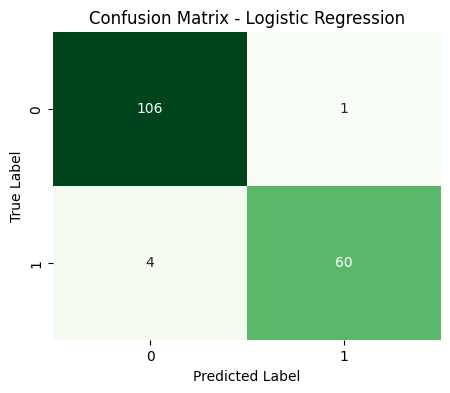

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# In báo cáo tổng hợp
print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

# Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
